## <font color = "red">Question 1 : Robot Dataset</font>

## Import Essential Modules :
**Numpy :** <font color = blue>Array based efficient computations</font><br>
**Pandas :** <font color = blue>Manipulation of Datasets</font><br>
**pprint :** <font color = blue>Printing Decision Trees in a linearised way</font><br>

In [3]:
import numpy as np
import math
import pprint
import operator
import ipdb
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

### Load Dataset stored in external  file in a pandas DataFrame
<font color = blue>The dataset starts with blank column, so it is to be handled accordingly.</font>

In [4]:
def load_preprocess_data(path):
    dataset = pd.read_csv(path, delimiter = " ", names = ['none', 'class_label', 'att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7'])
    drop_index = [0]
    dataset.drop(dataset.columns[drop_index],axis=1,inplace=True)
    dataset = dataset[['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7','class_label']]
    dataset.drop(dataset.columns[6],axis=1,inplace=True)
    return dataset

### <font color = "blue"> The manhattan distance between two points is defined as : $d(M,P)=\left | M_{x}\ -\ P_{x}\right |\ +\ \left | M_{y}\ -\ P_{y}\right |$

In [5]:
def manhattan_distance(p1, p2):
    distance = 0.0
    for i in range(0, len(p1) - 1):
        distance += (np.absolute(p1[i] - p2[i]))
    return distance

### <font color = "blue"> The Euclids distance between two points is defined as : $d(M,P)= \sqrt{\left ( M_{x}\ -\ P_{x}\right )^2\ +\ \left ( M_{y}\ -\ P_{y}\right)^2}$

In [6]:
def euclid_distance(p1, p2):
    distance = 0.0
    for i in range(0, len(p1) - 1):
        distance += (np.square(p1[i] - p2[i]))
    return np.sqrt(distance)

### <font color = "blue"> The Euclids distance between two points is defined as : $d(M,P)= \sqrt[p]{\left | M_{x}\ -\ P_{x}\right |^p\ +\ \left | M_{y}\ -\ P_{y}\right|^p}$

In [7]:
def minkowski_distance(p1, p2):
    distance = 0.0
    p = 3
    for i in range(0, len(p1) - 1):
        distance += np.power(abs(p1[i] - p2[i]),p) 
    distance = np.power(distance , (1/p))
    return distance

### <font color = "blue">Get Neighbours of a sample point using the distance measure specified

In [8]:
def get_neighbours(training_set, test_instance, measure):
    distances = []
    if(measure == "euclid"):
        for index, train_instance in training_set.iterrows():
            dist = euclid_distance(train_instance, test_instance)
            label = train_instance["class_label"]
            distances.append([label, dist])
            
    elif(measure == "manhattan"):
         for index, train_instance in training_set.iterrows():
            dist = manhattan_distance(train_instance, test_instance)
            label = train_instance["class_label"]
            distances.append([label, dist])
    else:
        for index, train_instance in training_set.iterrows():
            dist = minkowski_distance(train_instance, test_instance)
            label = train_instance["class_label"]
            distances.append([label, dist])
            
    return sorted(distances, key = operator.itemgetter(1))

### <font color = "blue"> This function finds the cumulative winner by considering all all K values. K lies between 2 to number of sample points.

In [9]:
def knn(training_set, test_set, measure):
    predictions = []
    distances = []
    for index, test_instance in test_set.iterrows():
        distances.append((get_neighbours(training_set, test_instance, measure)))
        
    temp = []
    count_0 = 0
    count_1 = 0
    for i in range(0, len(distances)):
        length = len(distances[i])
        for j in range(0, length):
            if(distances[i][j][0] == 0):
                count_0 += 1
            else:
                count_1 += 1
            if (count_0 >= count_1):
                temp.append(0)
            else:
                temp.append(1)
        predictions.append(temp)
        count_0 = 0
        count_1 = 0
        temp = []
    
    return predictions
        
        

### <font color = "blue">Utility to measure accuracy for validation dataset

In [10]:
def accuracy(k, measure, dataset_index):
    t_pos = 0 
    t_neg = 0
    f_pos = 0
    f_neg = 0
    predicted = []
    
    dataset_1 = "./RobotDataset/Robot1"
    dataset_2 = "./RobotDataset/Robot2"
    
    if(dataset_index == 1):
        dataset = load_preprocess_data(dataset_1)
    else:
        dataset = load_preprocess_data(dataset_2)
    # train_data = dataset.sample(frac=0.8)
    # val_data = dataset.drop(train_data.index)
    train_data, val_data = np.split(dataset, [int(.8*len(dataset))])
    
    actual = val_data["class_label"].tolist()
    result = knn(train_data, val_data, measure)
    for i in range(0, len(result)):
        predicted.append(result[i][k - 1])
        
    for i in range(0, len(predicted)):
        if (predicted[i] == 0 and actual[i] == 0):
            t_neg += 1
        elif (predicted[i] == 0 and actual[i] == 1):
            f_neg += 1
        elif (predicted[i] == 1 and actual[i] == 0):
            f_pos += 1
        else:
            t_pos += 1
    return t_pos, t_neg, f_pos, f_neg  

### <font color = "blue"> This function calculates various performance measures

In [11]:
def validate_robo(measure, dataset_index):
    output = pd.DataFrame(columns = ['K', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
    for k in range(1, 12, 2):
        tp, tn, fp, fn = accuracy(k, measure, dataset_index)
        total = tp + tn + fp + fn
        accuracy_estimate = (tn + tp) / (total) * 100
        precision_estimate = tp / (tp + fp) * 100
        recall_estimate = (tp) / (tp + fn) * 100
        f1_score = (1 / recall_estimate) + (1 / precision_estimate)
        f1_score = (2 / f1_score)
        output = output.append({'K':k, 'Accuracy':accuracy_estimate, 'Precision':precision_estimate, 'Recall':recall_estimate, 'F1 Score':f1_score}, ignore_index=True)
    return output
    
        

### <font color = "blue"> Utility to plot graphs

In [12]:
def plot_graph(data):
    plt.rcParams['figure.figsize'] = (8,4)
    data.plot(kind='line',x = 'K',y = 'Accuracy',color = 'blue')
    plt.show()

## Robot 1 Dataset
### <font color = "blue"> DataFrame showing various performance measures using Euclidian Distance for KNN

In [13]:
euclid_result_1 = validate_robo("euclid", 1)
euclid_result_1

,K,Accuracy,Precision,Recall,F1 Score
0,1.0,56.0,81.250000,61.904762,70.270270
1,3.0,76.0,94.117647,76.190476,84.210526
2,5.0,76.0,94.117647,76.190476,84.210526
3,7.0,84.0,100.000000,80.952381,89.473684
4,9.0,80.0,100.000000,76.190476,86.486486
5,11.0,68.0,100.000000,61.904762,76.470588


### <font color = "blue">Graph Plotting : Accuracy vs 'K' value using Euclidian Distance

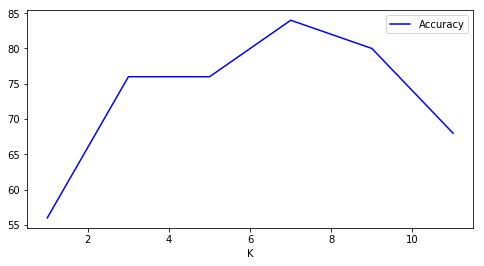

In [14]:
plot_graph(euclid_result_1)

### <font color = "blue"> Showing various performance measures using Manhattan Distance for KNN

In [15]:
manhattan_result_1 = validate_robo("manhattan", 1)
manhattan_result_1

,K,Accuracy,Precision,Recall,F1 Score
0,1.0,48.0,78.571429,52.380952,62.857143
1,3.0,52.0,90.909091,47.619048,62.500000
2,5.0,56.0,100.000000,47.619048,64.516129
3,7.0,56.0,100.000000,47.619048,64.516129
4,9.0,56.0,100.000000,47.619048,64.516129
5,11.0,52.0,100.000000,42.857143,60.000000


### <font color = "blue">Graph Plotting : Accuracy vs 'K' value using Manhattan Distance

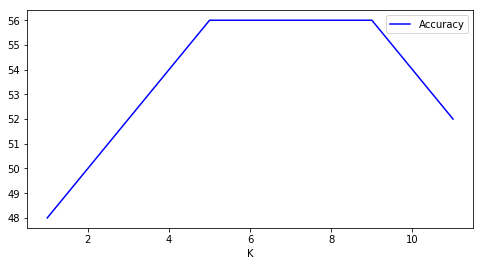

In [16]:
plot_graph(manhattan_result_1)

### <font color = "blue">DataFrame showing various performance measures using Minkowski Distance for KNN

In [17]:
minkowski_result_1 = validate_robo("minkowski", 1)
minkowski_result_1

,K,Accuracy,Precision,Recall,F1 Score
0,1.0,56.0,81.250000,61.904762,70.270270
1,3.0,76.0,94.117647,76.190476,84.210526
2,5.0,80.0,94.444444,80.952381,87.179487
3,7.0,96.0,100.000000,95.238095,97.560976
4,9.0,84.0,100.000000,80.952381,89.473684
5,11.0,72.0,100.000000,66.666667,80.000000


### <font color = "blue">Graph Plotting : Accuracy vs 'K' value using Minkowski Distance

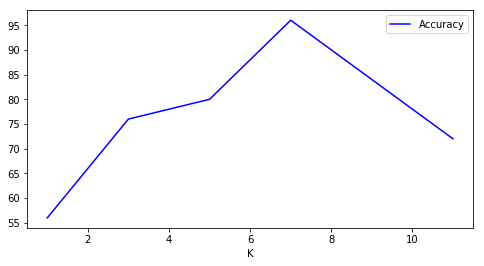

In [18]:
plot_graph(minkowski_result_1)

## Robot 2 Dataset
### <font color = "blue">DataFrame showing various performance measures using Euclidian Distance for KNN

In [19]:
euclid_result_2 = validate_robo("euclid", 2)
euclid_result_2

,K,Accuracy,Precision,Recall,F1 Score
0,1.0,80.0,75.0,81.818182,78.260870
1,3.0,92.0,100.0,81.818182,90.000000
2,5.0,88.0,90.0,81.818182,85.714286
3,7.0,92.0,100.0,81.818182,90.000000
4,9.0,92.0,100.0,81.818182,90.000000
5,11.0,84.0,100.0,63.636364,77.777778


### <font color = "blue">Graph Plotting : Accuracy vs 'K' value using Euclidian Distance

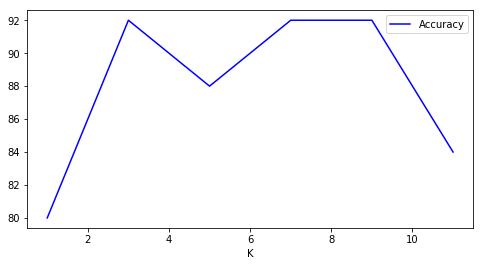

In [20]:
plot_graph(euclid_result_2)

### <font color = "blue">DataFrame showing various performance measures using Manhattan Distance for KNN

In [21]:
manhattan_result_2 = validate_robo("manhattan", 2)
manhattan_result_2

,K,Accuracy,Precision,Recall,F1 Score
0,1.0,84.0,88.888889,72.727273,80.000000
1,3.0,88.0,90.000000,81.818182,85.714286
2,5.0,84.0,88.888889,72.727273,80.000000
3,7.0,88.0,90.000000,81.818182,85.714286
4,9.0,88.0,90.000000,81.818182,85.714286
5,11.0,88.0,90.000000,81.818182,85.714286


### <font color = "blue">Graph Plotting : Accuracy vs 'K' value using Manhattan Distance

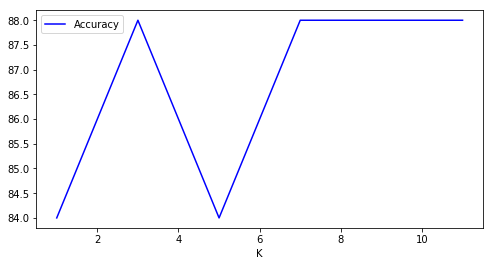

In [22]:
plot_graph(manhattan_result_2)

### <font color = "blue">DataFrame showing various performance measures using Minkowski Distance for KNN

In [23]:
minkowski_result_2 = validate_robo("minkowski", 2)
minkowski_result_2

,K,Accuracy,Precision,Recall,F1 Score
0,1.0,80.0,75.000000,81.818182,78.260870
1,3.0,92.0,100.000000,81.818182,90.000000
2,5.0,84.0,81.818182,81.818182,81.818182
3,7.0,92.0,100.000000,81.818182,90.000000
4,9.0,92.0,100.000000,81.818182,90.000000
5,11.0,84.0,100.000000,63.636364,77.777778


### <font color = "blue">Graph Plotting : Accuracy vs 'K' value using Minkowski Distance

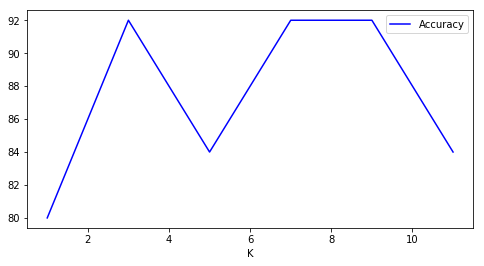

In [24]:
plot_graph(minkowski_result_2)

## OBSERVATIONS

### <font color = "blue"> Since k-NN classification is based on measuring the distance between the test data and each of the training data, the chosen distance function can affect the classification accuracy.
### In addition, as different domain problem datasets usually contain different types of data, such as the categorical, numerical, and mixed types of data, therefore the selection should be made accordingly.
### https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4978658/ : Using the link as a reference :Experimental results show that k-NN by the Chi square distance function can make the k-NN classifier perform the best over the three different types of datasets. On the other hand, using the Euclidean distance function performs reasonably well over the categorical and numerical datasets, but not for the mixed type of datasets.
### The small value of K will lead to a large variance in predictions. Alternatively, setting K to a large value may lead to a large model bias. Thus, K should be set to a value large enough to minimize the probability of misclassification and small enough (with respect to the number of cases in the example sample) so that the K nearest points are closer to the query point. 


### <h1 font color = "blue" align = "center"> *********** END *************** </font>